# 机器学习练习8 集成学习

课程完整代码：https://github.com/fengdu78/WZU-machine-learning-course

代码修改并注释：黄海广，haiguang2000@wzu.edu.cn 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split  

## 生成数据
生成12000行的数据，训练集和测试集按照3:1划分

In [2]:
from sklearn.datasets import make_hastie_10_2

data, target = make_hastie_10_2()
df = pd.DataFrame(data)
df['target'] = target
df.head()


,0,1,2,3,4,5,6,7,8,9,target
0,0.352473,-1.406437,-0.055034,0.057842,0.534032,-1.338223,-1.779813,0.637839,-0.248748,1.030702,-1.0
1,0.275439,-1.684873,-0.067213,0.451205,-0.110507,0.526831,-0.519537,-2.300506,-0.260373,0.016300,-1.0
2,0.513782,0.678774,0.827555,-1.309280,-2.383240,-0.692415,0.252341,1.401432,-0.511025,-1.789222,1.0
3,-0.672879,1.194133,-0.131353,0.321330,0.577228,0.355940,-0.339521,0.599280,0.106822,0.500225,-1.0
4,-0.912931,-0.387088,0.488149,0.625803,0.380481,1.165985,1.468265,-1.166202,-0.522427,1.050895,-1.0


## 数据 分析 

(5943, 11)


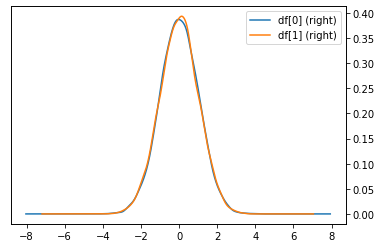

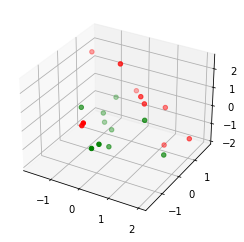

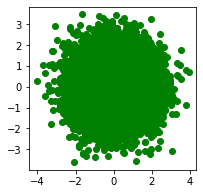

In [3]:
'''
引用链接 https://blog.csdn.net/qq_42902997/article/details/109201281  
         https://blog.csdn.net/zhoulei124/article/details/89235683  
         https://blog.csdn.net/weixin_44080811/article/details/95750019?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.no_search_link&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.no_search_link
         https://blog.csdn.net/fengdu78/article/details/107888652
'''
import matplotlib.pyplot as plt

#验证数据的正态性
df[0].plot(kind='kde',secondary_y=True,label='df[0]')
df[1].plot(kind='kde',secondary_y=True,label='df[1]')
plt.legend()

#数据可视化
df1 = df[df['target']==-1]
df2 = df[df['target']==1]

df1.index = range(len(df1))#调整行索引
df2.index = range(len(df2))
print(df1.shape)  #(5992, 11)

#fig, ax = plt.subplots(1,2,figsize=(12, 8))
fig = plt.figure()
ax = fig.gca(projection='3d')
#这里用上面的两行也可以，是一个原理,只不过上面可以设置图片的大小
#ax = plt.gca(projection='3d')

#这里df1[0].head()表示df1的第0列数据的前10个数据
ax.scatter(df1[0].head(10),df1[1].head(10),df1[2].head(10),color='green')
ax.scatter(df2[0].head(10),df2[1].head(10),df2[2].head(10),color='red')

#这里绘制一个2d图像，由于数据太多不是太清楚
plt.figure(figsize=(3,3))
plt.scatter(df1[0],df1[1],color='red')
plt.scatter(df2[0],df2[1],color='green')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=123)
X_train.shape, X_test.shape

((9000, 10), (3000, 10))

## 模型对比
对比六大模型，都使用默认参数，因为数据是

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import time

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = AdaBoostClassifier()
clf4 = GradientBoostingClassifier()
clf5 = XGBClassifier(eval_metric='mlogloss')#这里不添加里面的参数会产生警告，原因版本问题objective ‘binary:logistic’ was changed from ‘error’ to ‘logloss’.
clf6 = LGBMClassifier()

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6], [
        'Logistic Regression', 'Random Forest', 'AdaBoost', 'GBDT', 'XGBoost',
        'LightGBM'
]):
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    end = time.time()
    running_time = end - start
    print("Accuracy: %0.8f (+/- %0.2f),耗时%0.2f秒。模型名称[%s]" %
          (scores.mean(), scores.std(), running_time, label))

Accuracy: 0.48588889 (+/- 0.01),耗时0.03秒。模型名称[Logistic Regression]
Accuracy: 0.89033333 (+/- 0.00),耗时11.23秒。模型名称[Random Forest]
Accuracy: 0.87544444 (+/- 0.00),耗时2.25秒。模型名称[AdaBoost]
Accuracy: 0.91466667 (+/- 0.00),耗时9.18秒。模型名称[GBDT]
Accuracy: 0.92933333 (+/- 0.00),耗时1.65秒。模型名称[XGBoost]
Accuracy: 0.93366667 (+/- 0.00),耗时0.50秒。模型名称[LightGBM]


对比了六大模型，可以看出，逻辑回归速度最快，但准确率最低。
而LightGBM，速度快，而且准确率最高，所以，现在处理结构化数据的时候，大部分都是用LightGBM算法。

## XGBoost的使用

### 1.原生XGBoost的使用

In [7]:
import xgboost as xgb
#记录程序运行时间
import time

start_time = time.time()

#xgb矩阵赋值，https://blog.csdn.net/weixin_43615654/article/details/103216022
xgb_train = xgb.DMatrix(X_train, y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
##参数
params = {
    'booster': 'gbtree',
#     'silent': 1,  #设置成1则没有运行信息输出，最好是设置为0.
    #'nthread':7,# cpu 线程数 默认最大
    'eta': 0.007,  # 如同学习率
    'min_child_weight': 3,
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
    'max_depth': 6,  # 构建树的深度，越大越容易过拟合
    'gamma': 0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
    'subsample': 0.7,  # 随机采样训练样本
    'colsample_bytree': 0.7,  # 生成树时进行的列采样 
    'lambda': 2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    #'alpha':0, # L1 正则项参数
    #'scale_pos_weight':1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。
    #'objective': 'multi:softmax', #多分类的问题
    #'num_class':10, # 类别数，多分类与 multisoftmax 并用
    'seed': 1000,  #随机种子
    #'eval_metric': 'auc'
}
plst = list(params.items())#items() 函数以列表返回可遍历的(键, 值) 元组数组
num_rounds = 500  # 迭代次数
watchlist = [(xgb_train, 'train'), (xgb_test, 'val')]

In [8]:
#训练模型并保存
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(
    plst,
    xgb_train,
    num_rounds,
    watchlist,
    early_stopping_rounds=100,
)
#model.save_model('./model/xgb.model') # 用于存储训练出的模型
print("best best_ntree_limit", model.best_ntree_limit)
y_pred = model.predict(xgb_test, ntree_limit=model.best_ntree_limit)
print('error=%f' %
      (sum(1
           for i in range(len(y_pred)) if int(y_pred[i] > 0.5) != y_test[i]) /
       float(len(y_pred))))
# 输出运行时长
cost_time = time.time() - start_time
print("xgboost success!", '\n', "cost time:", cost_time, "(s)......")

[0]	train-rmse:1.11039	val-rmse:1.11337
[1]	train-rmse:1.10771	val-rmse:1.11082
[2]	train-rmse:1.10507	val-rmse:1.10831
[3]	train-rmse:1.10243	val-rmse:1.10577
[4]	train-rmse:1.09985	val-rmse:1.10331
[5]	train-rmse:1.09722	val-rmse:1.10084
[6]	train-rmse:1.09463	val-rmse:1.09838
[7]	train-rmse:1.09214	val-rmse:1.09598
[8]	train-rmse:1.08965	val-rmse:1.09363
[9]	train-rmse:1.08712	val-rmse:1.09127
[10]	train-rmse:1.08468	val-rmse:1.08898
[11]	train-rmse:1.08214	val-rmse:1.08659
[12]	train-rmse:1.07968	val-rmse:1.08424
[13]	train-rmse:1.07728	val-rmse:1.08198
[14]	train-rmse:1.07484	val-rmse:1.07968
[15]	train-rmse:1.07244	val-rmse:1.07742
[16]	train-rmse:1.07006	val-rmse:1.07516
[17]	train-rmse:1.06767	val-rmse:1.07290
[18]	train-rmse:1.06537	val-rmse:1.07072
[19]	train-rmse:1.06294	val-rmse:1.06846
[20]	train-rmse:1.06056	val-rmse:1.06622
[21]	train-rmse:1.05830	val-rmse:1.06403
[22]	train-rmse:1.05602	val-rmse:1.06187
[23]	train-rmse:1.05374	val-rmse:1.05973
[24]	train-rmse:1.05158	va

### 2.使用scikit-learn接口
会改变的函数名是：

eta -> learning_rate

lambda -> reg_lambda

alpha -> reg_alpha

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from xgboost import XGBClassifier

clf = XGBClassifier(
    #     silent=0,  #设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
    #nthread=4,# cpu 线程数 默认最大
    learning_rate=0.3,  # 如同学习率
    min_child_weight=1,
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
    max_depth=6,  # 构建树的深度，越大越容易过拟合
    gamma=0,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
    subsample=1,  # 随机采样训练样本 训练实例的子采样比
    max_delta_step=0,  #最大增量步长，我们允许每个树的权重估计。
    colsample_bytree=1,  # 生成树时进行的列采样 
    reg_lambda=1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    #reg_alpha=0, # L1 正则项参数
    #scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
    #objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
    #num_class=10, # 类别数，多分类与 multisoftmax 并用
    n_estimators=100,  #树的个数
    seed=1000, #随机种子
    #eval_metric= 'auc'
    eval_metric='mlogloss'#添加此项不会出现版本警告
)
clf.fit(X_train, y_train)

#用来评判模型的得分
from sklearn.model_selection import cross_val_score
# print(cross_val_score(clf, X_train, y_train, cv=3))#[0.92466667 0.929      0.92      ]

y_true, y_pred = y_test, clf.predict(X_test)
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

Accuracy : 0.9413


## LIghtGBM的使用
### 1.原生接口

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
# 加载你的数据
# print('Load data...')
# df_train = pd.read_csv('../regression/regression.train', header=None, sep='\t')
# df_test = pd.read_csv('../regression/regression.test', header=None, sep='\t')
#
# y_train = df_train[0].values
# y_test = df_test[0].values
# X_train = df_train.drop(0, axis=1).values
# X_test = df_test.drop(0, axis=1).values

# 创建成lgb特征的数据集格式
lgb_train = lgb.Dataset(X_train, y_train)  # 将数据保存到LightGBM二进制文件将使加载更快
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)  # 创建验证数据

# 将参数写成字典下形式
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

print('Start training...')
# 训练 cv and train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)  # 训练数据需要参数列表和数据集

print('Save model...')

gbm.save_model('model.txt')  # 训练后保存模型到文件

print('Start predicting...')
# 预测数据集
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration
                     )  #如果在训练期间启用了早期停止，可以通过best_iteration方式从最佳迭代中获得预测
# 评估模型
print('error=%f' %
      (sum(1
           for i in range(len(y_pred)) if int(y_pred[i] > 0.5) != y_test[i]) /
       float(len(y_pred))))

Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 10
[LightGBM] [Info] Start training from score 0.012000
[1]	valid_0's auc: 0.814399	valid_0's l2: 0.965563
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.84729	valid_0's l2: 0.934647
[3]	valid_0's auc: 0.872805	valid_0's l2: 0.905265
[4]	valid_0's auc: 0.884117	valid_0's l2: 0.877875
[5]	valid_0's auc: 0.895115	valid_0's l2: 0.852189
[6]	valid_0's auc: 0.905545	valid_0's l2: 0.826298
[7]	valid_0's auc: 0.909113	valid_0's l2: 0.803776
[8]	valid_0's auc: 0.913303	valid_0's l2: 0.781627
[9]	valid_0's auc: 0.917894	valid_0's l2: 0.760624
[10]	valid_0's auc: 0.919443	valid_0's l2: 0.742882
[11]	valid_0's auc: 0.921543	valid_0's l2: 0.723811
[12]	valid_0's a

## 2.scikit-learn接口

In [17]:
from sklearn import metrics
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    boosting_type='gbdt',  # 提升树的类型 gbdt,dart,goss,rf
    num_leaves=31,  #树的最大叶子数，对比xgboost一般为2^(max_depth)
    max_depth=-1,  #最大树的深度
    learning_rate=0.1,  #学习率
    n_estimators=100,  # 拟合的树的棵树，相当于训练轮数
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,  # 最小分割增益
    min_child_weight=0.001,  # 分支结点的最小权重
    min_child_samples=20,
    subsample=1.0,  # 训练样本采样率 行
    subsample_freq=0,  # 子样本频率
    colsample_bytree=1.0,  # 训练特征采样率 列
    reg_alpha=0.0,  # L1正则化系数
    reg_lambda=0.0,  # L2正则化系数
    random_state=None,
    n_jobs=-1,
    silent=True,
)
clf.fit(X_train, y_train, eval_metric='auc')
#设置验证集合 verbose=False不打印过程
#clf.fit(X_train, y_train)

y_true, y_pred = y_test, clf.predict(X_test)
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

Accuracy : 0.9363


## 参考
1.https://xgboost.readthedocs.io/

2.https://lightgbm.readthedocs.io/

3.https://blog.csdn.net/q383700092/article/details/53763328?locationNum=9&fps=1